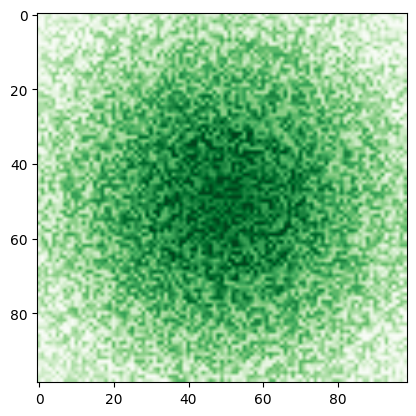

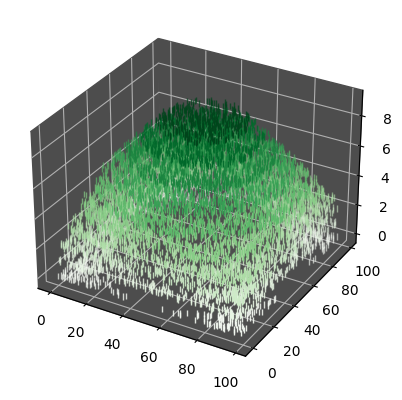

In [107]:
import matplotlib.pyplot as plt

data = [[int(num) for num in num.replace("\n","")] for num in open('input.txt').readlines()]
x = [[i for j in range(0,99)] for i in range(0,99)]
y = [[j for j in range(0,99)] for i in range(0,99)]

plt.imshow( data, cmap = 'Greens' , interpolation = 'bilinear')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x, y, data, c=data, cmap='Greens',marker="|",linewidths=1.0);
ax.xaxis.set_pane_color((0.3, 0.3, 0.3, 1.0))
ax.yaxis.set_pane_color((0.3, 0.3, 0.3, 1.0))
ax.zaxis.set_pane_color((0.3, 0.3, 0.3, 1.0))
plt.show()

Ans to P1: 1845
 Green = Visible


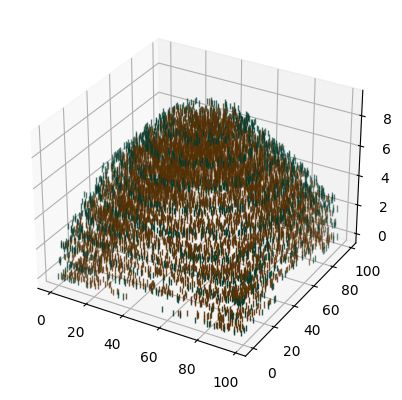

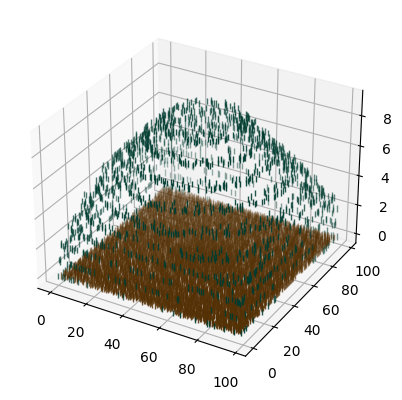

In [108]:
import numpy as np

forest = np.array(data)

visibleTable = np.ones((len(forest),len(forest)))
visibleTable[1:-1,1:-1] = 0

visible = len(forest)*2 + (len(forest)-2)*2
for i in range(1,len(forest)-1):
    for j in range(1,len(forest[0])-1):
        currTree = forest[i,j]
        isTallest = min(max(forest[0:i,j]),max(forest[i+1:,j]),max(forest[i,j+1:]),max(forest[i,0:j])) < currTree
        if isTallest:
            visible += 1
            visibleTable[i,j] = 1
   
print("Ans to P1: " + str(visible) +"\n Green = Visible")

#viz 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x, y, data, c=visibleTable, cmap='BrBG',marker="|",linewidths=1.0);
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x, y, np.multiply(forest, visibleTable), c=visibleTable, cmap='BrBG',marker="|",linewidths=1.0);
plt.show()


Ans to P2: 230112
 Green = Visible


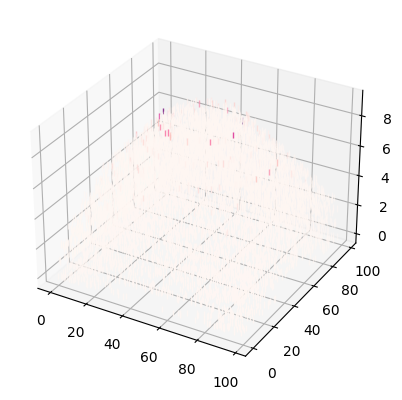

In [116]:
import numpy as np

forest = np.array(data)

scoreTable = np.ones((len(forest),len(forest)))

for i in range(0,len(forest)-1):
    for j in range(0,len(forest[0])-1):
        currTree = forest[i,j]

        top = [0 if num < currTree else 1 for num in forest[0:i,j]][::-1]
        scoreTable[i,j] *= top.index(1)+1 if 1 in top else len(top)
            
        bot = [0 if num < currTree else 1 for num in forest[i+1:,j]]
        scoreTable[i,j] *= bot.index(1)+1 if 1 in bot else len(bot)
        
        right = [0 if num < currTree else 1 for num in forest[i,j+1:]]
        scoreTable[i,j] *= right.index(1)+1 if 1 in right else len(right)
        
        left = [0 if num < currTree else 1 for num in forest[i,0:j]][::-1]
        scoreTable[i,j] *= left.index(1)+1 if 1 in left else len(left)
        

print("Ans to P2: " + str(int(np.amax(scoreTable))) +"\n Green = Visible")

#viz 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x, y, data, c=scoreTable, cmap='RdPu',marker="|",linewidths=1.0);
plt.show()
